In [2]:
#import libraties
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import warnings

In [3]:
#import data
data = pd.read_csv("/home/aswin/data/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Applied Models:

Logistic Regression

KNN

SVM

In [3]:
# Creat DataFrame
diabets_df = pd.DataFrame(data)

In [4]:
data.describe(include = "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Visualization & Analysis

In [5]:
diabets_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabets_df.shape

(768, 9)

In [7]:
# Show detaile columns
diabets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# How many missing value?
diabets_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
desc = data.describe().T
desc

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


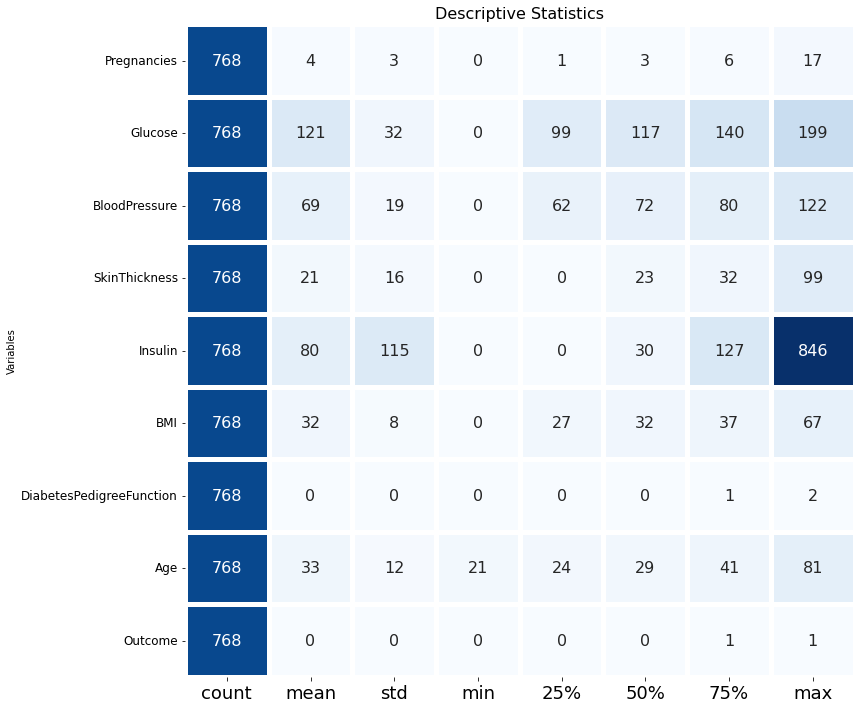

In [9]:
# Show detaile data set
desc = diabets_df.describe().T
diabets_df2 = pd.DataFrame(index=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                          'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], 
                   columns= ["count","mean","std","min",
                             "25%","50%","75%","max"], data= desc )

f,ax = plt.subplots(figsize=(12,12))

sns.heatmap(diabets_df2, annot=True,cmap = "Blues", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 16})

plt.xticks(size = 18)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

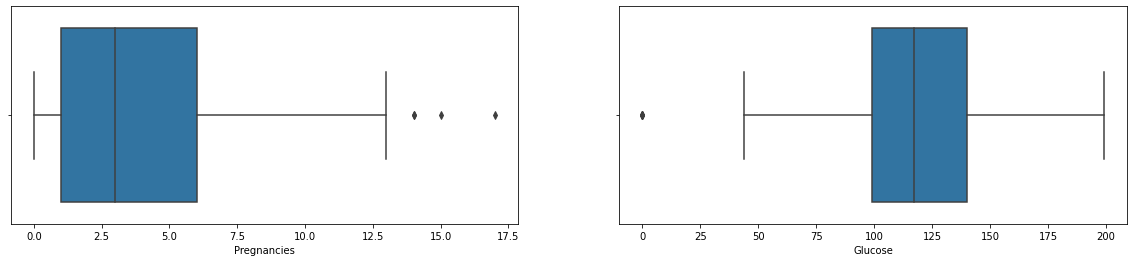

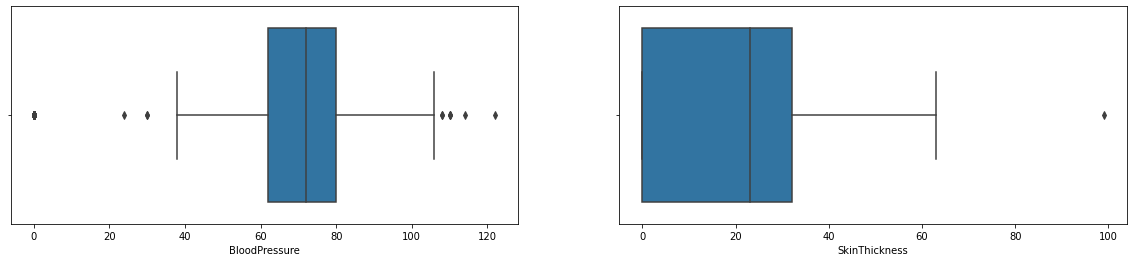

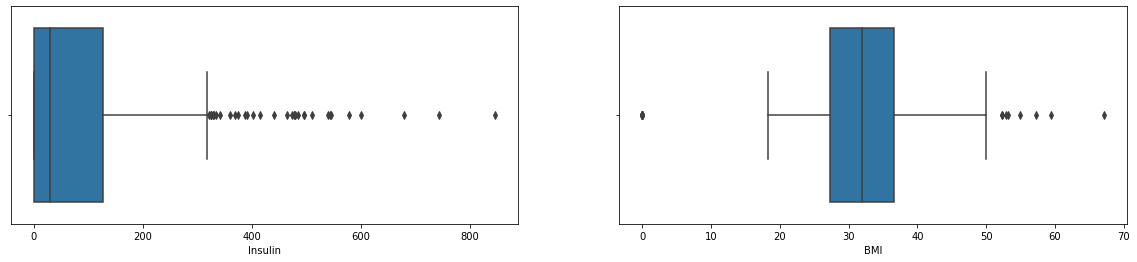

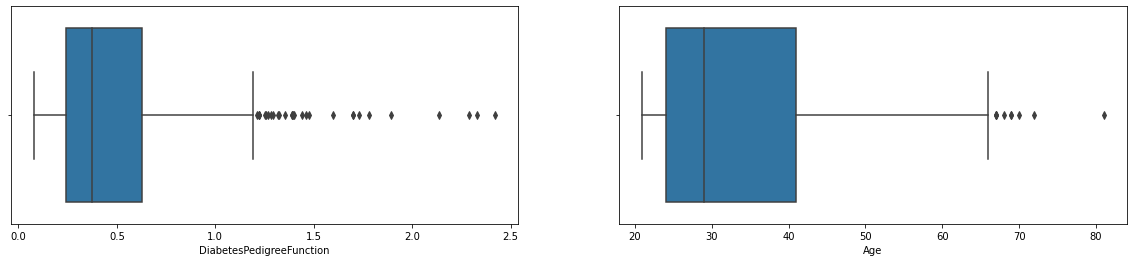

In [10]:
## plot for numerical columns
Numerical = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
i = 0
while i <8:
    fig = plt.figure(figsize =[20,4])
    plt.subplot(1,2,1)   #(one row, two plots, firs one)
    sns.boxplot(x =Numerical[i], data = diabets_df )
    i+=1
    if i==8:
        break
    plt.subplot(1,2,2)
    sns.boxplot(x =Numerical[i], data = diabets_df)
    i+=1
  
    plt.show()

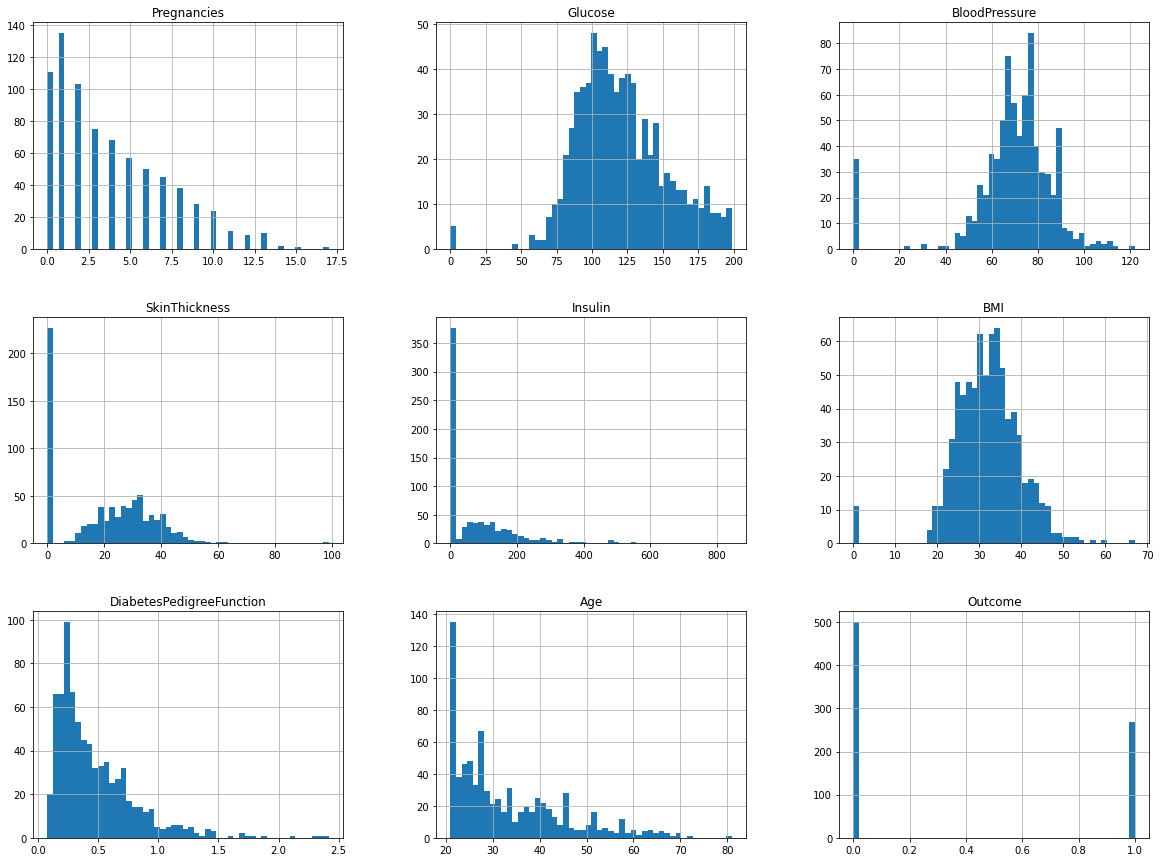

In [11]:
#histogram
diabets_df.hist(bins=50,figsize=(20,15))
plt.show()

In [12]:
diabets_df3 = diabets_df.copy()

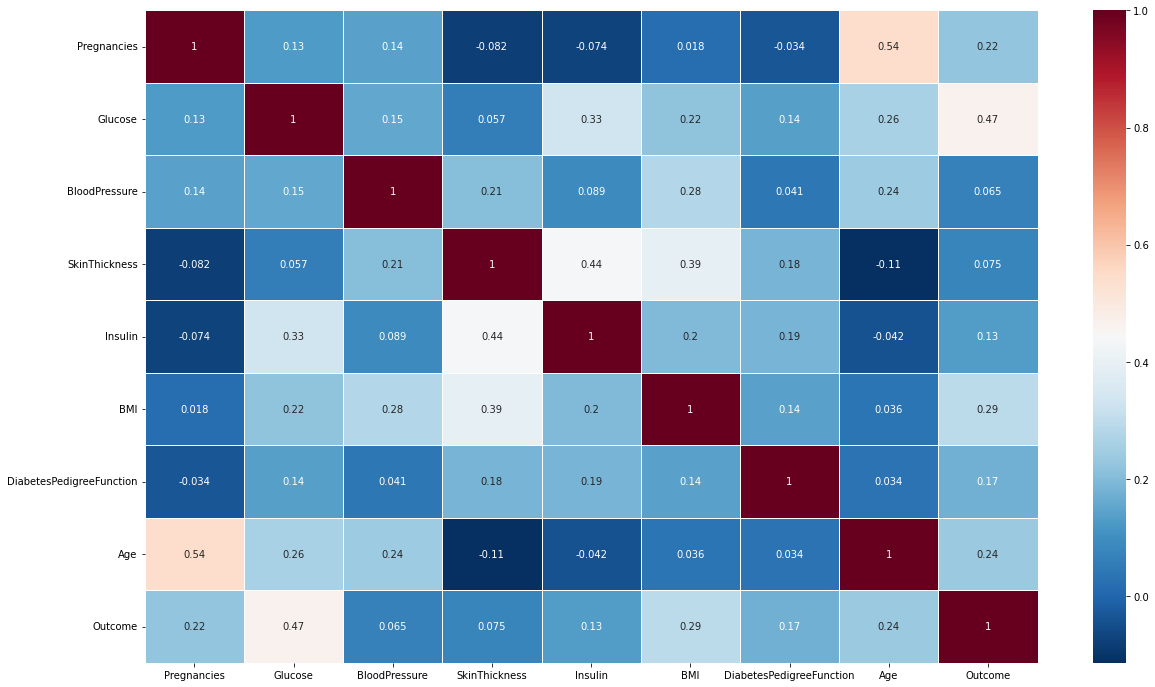

In [13]:
## Show correlation
fig, ax = plt.subplots(figsize = (20, 12)) #Size of plot
ax = sns.heatmap(diabets_df3.corr(),cmap='RdBu_r',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show()

###  Best correlation for Glucose

In [14]:
#correlation
diabets_df3.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [15]:
diabets_df3.corr()['Outcome'].sort_values(ascending=False) #Correlation for get information

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

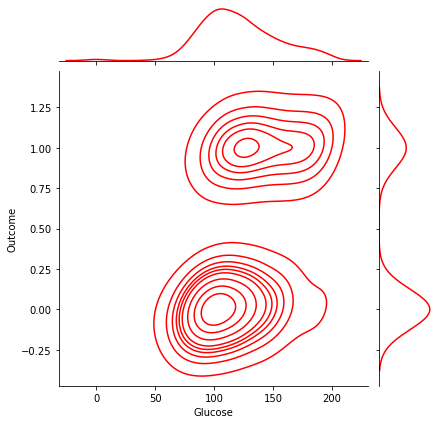

In [16]:
#### How does Glucose is affected by price
sns.jointplot(x='Glucose',y='Outcome',data=diabets_df3,color='red',kind='kde');

##  Creating & Training KNN Model

In [17]:
# Sellecting features
X = pd.DataFrame(diabets_df3, columns = ["Glucose","BloodPressure", "SkinThickness", "Insulin","BMI","DiabetesPedigreeFunction","Age"]).values
Y = diabets_df3.Outcome.values.reshape(-1,1)
X

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,   0.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,   0.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [18]:
# Splitting the data
X_train, X_test, Y_train, Y_test  =  train_test_split(X,Y, test_size = 0.3, random_state = 0)

### Modeling

In [19]:
K = 3
CLF = KNeighborsClassifier(K)
CLF.fit(X_train,Y_train.ravel() )
Y_pred = CLF.predict(X_test)

In [20]:
# Select Best value for K
K = 20
Acc = np.zeros((K))
for i in range(1 , K+1):
    CLF = KNeighborsClassifier(n_neighbors = i)
    CLF.fit(X_train,Y_train.ravel())
    Y_pred = CLF.predict(X_test)
    Acc[i-1] = metrics.accuracy_score(Y_test, Y_pred)
Acc

array([0.61038961, 0.71861472, 0.70995671, 0.74025974, 0.74458874,
       0.72727273, 0.75324675, 0.75324675, 0.75324675, 0.75324675,
       0.74891775, 0.74891775, 0.73593074, 0.73160173, 0.73593074,
       0.74025974, 0.74025974, 0.74025974, 0.73593074, 0.72727273])

In [21]:
# Show max & min
print(np.max(Acc))
print(np.min(Acc))

0.7532467532467533
0.6103896103896104


In [22]:
########  Another way

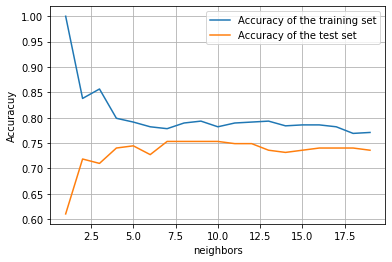

In [23]:
traing_acc = []
test_acc = []
# try KNN for diffrent k nearset neighbor from 1 ta 50
neighbors_setting = range(1,20)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train,Y_train.ravel())
    traing_acc.append(knn.score(X_train,Y_train))
    test_acc.append(knn.score(X_test, Y_test))

plt.plot(neighbors_setting, traing_acc, label = "Accuracy of the training set")
plt.plot(neighbors_setting, test_acc, label = "Accuracy of the test set")
plt.ylabel("Accuracuy")
plt.xlabel("neighbors")
plt.grid()
plt.legend()


In [24]:
#### Improval Model

In [25]:
from sklearn.model_selection import GridSearchCV
parametrs = {"n_neighbors": range(1,20) }
grid_kn = GridSearchCV(estimator = knn, #Model
                       param_grid = parametrs, #Range of K
                       scoring = "accuracy",
                       cv = 5,          # cross validation generator
                       verbose = 1,     #Time of calculate
                       n_jobs = -1)     #help to cpu
                       
            
                     
grid_kn.fit(X_train, Y_train.ravel())

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 20)}, scoring='accuracy',
             verbose=1)

In [26]:
CLF.score(X,Y)

0.7552083333333334

In [27]:
print("Accuracy:" , metrics.accuracy_score(Y_test,Y_pred ))

Accuracy: 0.7272727272727273


In [28]:
confusion_matrix(Y,CLF.predict(X))

array([[450,  50],
       [138, 130]])

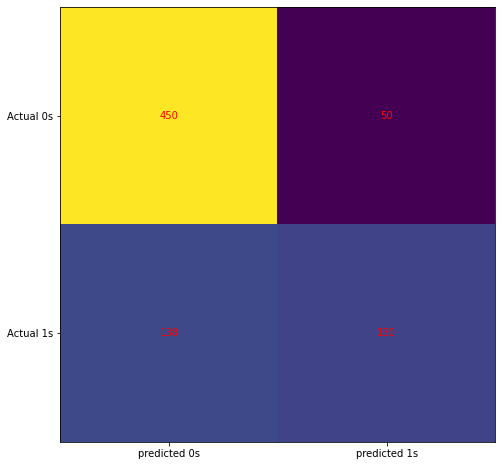

In [29]:
# Show plot for confusion matrix
cm = confusion_matrix(Y, CLF.predict(X))
fig , ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1) , ticklabels = ("predicted 0s", "predicted 1s"))
ax.yaxis.set(ticks = (0,1) , ticklabels = ("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5 , -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i , cm[i,j], ha = "center" , va = "center", color = "red")   
plt.show()

In [30]:
# Calculate classification
print(classification_report(Y, CLF.predict(X)))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       500
           1       0.72      0.49      0.58       268

    accuracy                           0.76       768
   macro avg       0.74      0.69      0.70       768
weighted avg       0.75      0.76      0.74       768



##  Creating & Training Logestic Regression Model

In [31]:
# Sellecting features
X = pd.DataFrame(diabets_df3 , columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])
Y = diabets_df3.Outcome

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state =0)

In [33]:
Logreg = LogisticRegression(solver = "liblinear")

In [34]:
Logreg.fit(X_train , Y_train)
Y_pred = Logreg.predict(X_test)

In [35]:
Y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [36]:
print("Accuracy:" , metrics.accuracy_score(Y_test,Y_pred ))

Accuracy: 0.8072916666666666


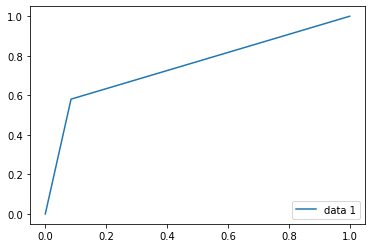

In [37]:
fpr , tpr,_ = metrics.roc_curve(Y_test,Y_pred)
plt.plot(fpr , tpr, label = "data 1")
plt.legend(loc = 4)
plt.show()

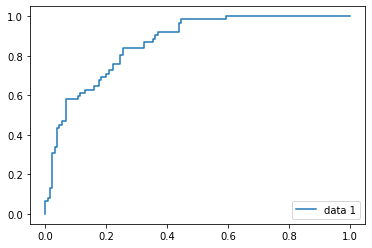

In [38]:
Y_pred_proba = Logreg.predict_proba(X_test)[::,1]
fpr , tpr,_ = metrics.roc_curve(Y_test,Y_pred_proba)
plt.plot(fpr , tpr, label = "data 1")
plt.legend(loc = 4)
plt.show()

In [39]:
Logreg.classes_

array([0, 1])

In [40]:
Logreg.intercept_

array([-5.45413386])

In [41]:
Logreg.coef_

array([[ 8.34612481e-02,  2.55666050e-02, -1.64871716e-02,
         5.59519421e-03, -5.38278319e-04,  5.43371349e-02,
         6.01706344e-01,  1.23641482e-02]])

In [42]:
Logreg.predict_proba(X)

array([[0.34063817, 0.65936183],
       [0.88929387, 0.11070613],
       [0.28840965, 0.71159035],
       ...,
       [0.7539826 , 0.2460174 ],
       [0.67081035, 0.32918965],
       [0.86387653, 0.13612347]])

In [43]:
Logreg.score(X,Y)

0.76953125

In [44]:
confusion_matrix(Y, Logreg.predict(X))

array([[443,  57],
       [120, 148]])

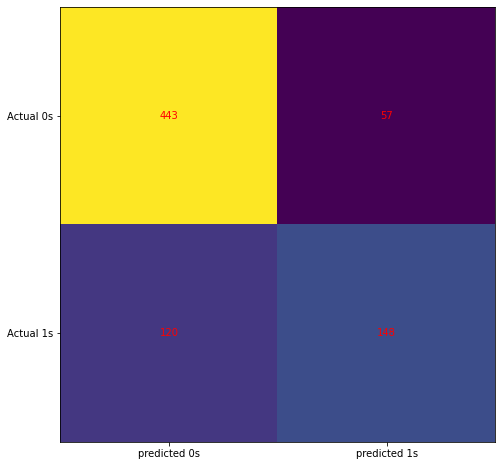

In [45]:
# show plot for confusion matrix
cm = confusion_matrix(Y, Logreg.predict(X))
fig , ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1) , ticklabels = ("predicted 0s", "predicted 1s"))
ax.yaxis.set(ticks = (0,1) , ticklabels = ("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5 , -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i , cm[i,j], ha = "center" , va = "center", color = "red")   
plt.show()

In [46]:
print(classification_report(Y, Logreg.predict(X)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       500
           1       0.72      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.75      0.72      0.73       768
weighted avg       0.76      0.77      0.76       768



## Creating & Training SVM Model

In [47]:
# Sellecting features
X = pd.DataFrame(diabets_df3 , columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])
Y = diabets_df3.Outcome

In [48]:
# Splitting the data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25 ,random_state = 1)

In [49]:
#Model
clf_svm = SVC(C=10.0) 
clf_svm = clf_svm.fit(X_train,Y_train )
y_pred = clf_svm.predict(X_test)

In [50]:
print("Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Accuracy:  0.7916666666666666


In [51]:
confusion_matrix(Y, clf_svm.predict(X))

array([[458,  42],
       [128, 140]])

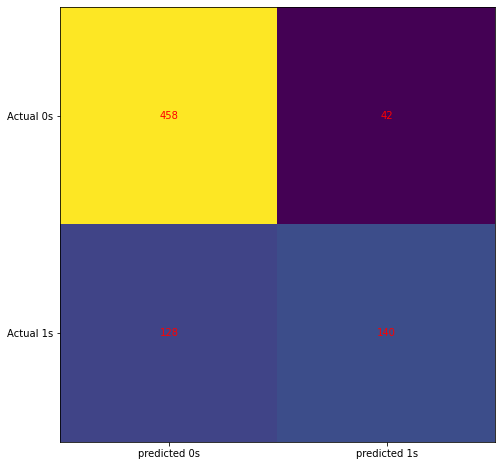

In [52]:
# show plot for confusion matrix
cm = confusion_matrix(Y, clf_svm.predict(X))
fig , ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1) , ticklabels = ("predicted 0s", "predicted 1s"))
ax.yaxis.set(ticks = (0,1) , ticklabels = ("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5 , -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i , cm[i,j], ha = "center" , va = "center", color = "red")   
plt.show()

## Conclusion:Best Algorithm is Logestic Regression

KNN Accuracy: 0.7272727272727273
    
Logestic Regression Accuracy: 0.8072916666666666
    
SVM Accuracy: 0.7916666666666666